#    Prediction of Client Subscription


## 1. Introduction

### 1.1 Source of the data
    Dataset link : https://archive.ics.uci.edu/ml/datasets/bank+marketing
    This dataset was taken from UC Irvine Repository.

### 1.2 Description of the dataset
1. The dataset captures information from direct marketing campaigns conducted by a Portuguese banking institution. 
2. These campaigns primarily involved phone calls, and the objective was to promote a specific financial product - a bank term deposit. 
3. Each entry in the dataset corresponds to a particular client and includes details such as age, job, marital status, education, and financial indicators like housing and loan status. 
4. The dataset encompasses 41188 instances, each with 21 features, covering a mix of categorical and integer data. 
5. Notably, the dataset provides insights into the necessity for multiple contacts with clients to determine if they would subscribe to the term deposit ('yes') or not ('no'). 
6. The 'y' variable serves as the target, indicating the outcome of the marketing effort.

### 1.3 Load the Dataset 

In [1]:
import pandas as pd
bank=pd.read_csv("bank.csv",sep=';')
print ("The shape of the  data is (row, column):"+ str(bank.shape))
bank.head()

The shape of the  data is (row, column):(41188, 21)


age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

### 1.4 Data Cleaning and Preprocessing 

In [2]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
bank.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [4]:
for col in bank.columns :
    print("Column name: "+col)
    print(bank[col].value_counts())
    print()

Column name: age
age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64

Column name: job
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

Column name: marital
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

Column name: education
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

Column name: default
default
no         32588
unknown     8597
yes         

Insights:

    1.We got unknown category in each feature, we should figure out how to deal with that
    2.This campaign only operated during weekdays
    3.I can't understand what is non-existent category in previous outcome aka poutcome, if you have figured out what is it let me know in the comments

In [5]:
print("Distinct values: ")
for col in bank.columns : 
    print('{:<20} ----- {:>10}'.format(col, len(bank[col].unique())))

Distinct values: 
age                  -----         78
job                  -----         12
marital              -----          4
education            -----          8
default              -----          3
housing              -----          3
loan                 -----          3
contact              -----          2
month                -----         10
day_of_week          -----          5
duration             -----       1544
campaign             -----         42
pdays                -----         27
previous             -----          8
poutcome             -----          3
emp.var.rate         -----         10
cons.price.idx       -----         26
cons.conf.idx        -----         26
euribor3m            -----        316
nr.employed          -----         11
y                    -----          2


In [6]:
# Processing the education
import numpy as np

print("Education types: ",bank['education'].unique())
bank['education']=np.where(bank['education'] =='basic.9y', 'basic', bank['education'])
bank['education']=np.where(bank['education'] =='basic.6y', 'basic', bank['education'])
bank['education']=np.where(bank['education'] =='basic.4y', 'basic', bank['education'])
print("After processing: ",bank['education'].unique())

Education types:  ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
After processing:  ['basic' 'high.school' 'professional.course' 'unknown' 'university.degree'
 'illiterate']


### 1.5 Handling missing values

In [7]:
print("Missing Values: ")
print(bank.isnull().sum(), sep = '\n')

Missing Values: 
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [8]:
print("Datset shape after preprocessing and handling missing values: ",bank.shape)

Datset shape after preprocessing and handling missing values:  (41188, 21)


## 2. Goal of the Project
    The primary goal associated with this dataset is classification. Specifically, the aim is to develop a predictive model that can determine whether a client will subscribe to the bank term deposit based on the provided features. In simpler terms, the model seeks to learn patterns and relationships within the client data to make accurate predictions regarding their likelihood of subscribing to the term deposit during future marketing campaigns. The features included in the dataset, ranging from demographic information to details about previous marketing interactions, provide the necessary input for the model to discern patterns influencing the subscription decision.

## 3. Data Analysis

### 3.1 Data visualization

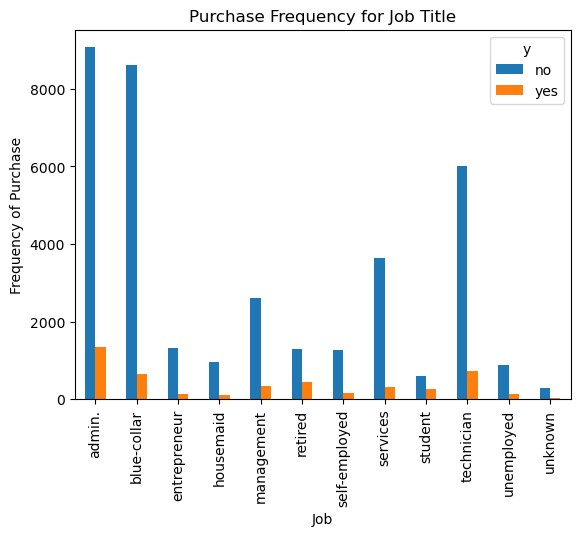

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
pd.crosstab(bank.job,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

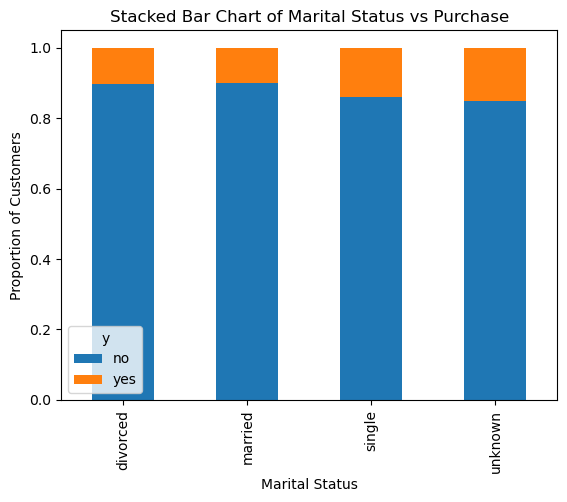

In [10]:
table=pd.crosstab(bank.marital,bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

Hard to see, but the marital status does not seem a strong predictor for the outcome variable.

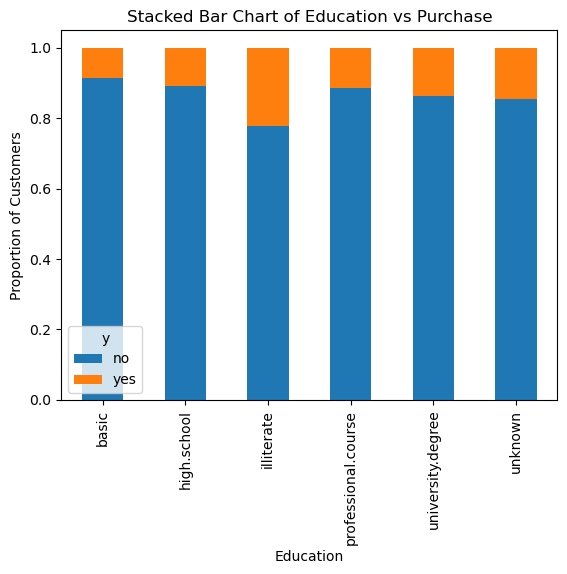

In [11]:
table=pd.crosstab(bank.education,bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

Education seems a good predictor of the outcome variable.

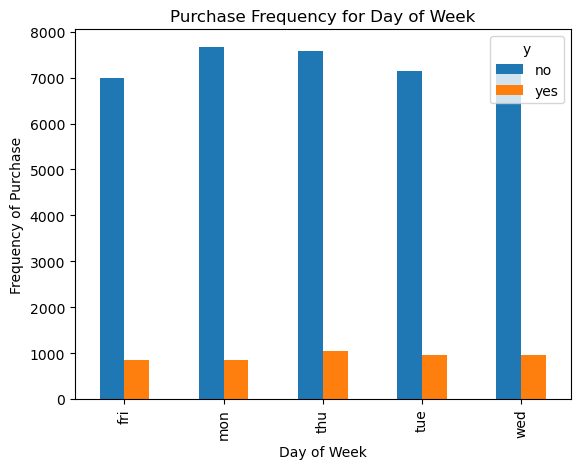

In [12]:
pd.crosstab(bank.day_of_week,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

Day of week may not be a good predictor of the outcome

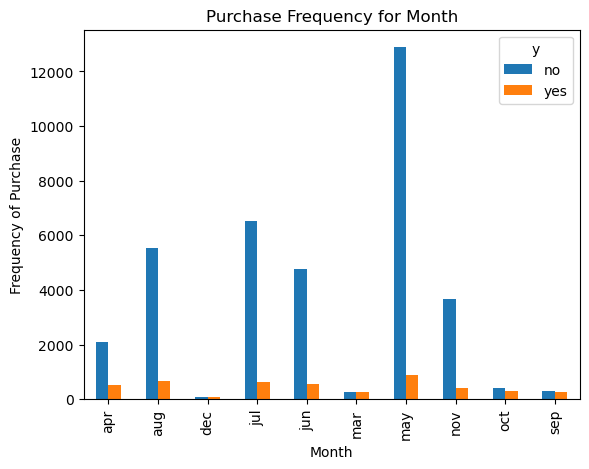

In [13]:
pd.crosstab(bank.month,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

Month might be a good predictor of the outcome variable

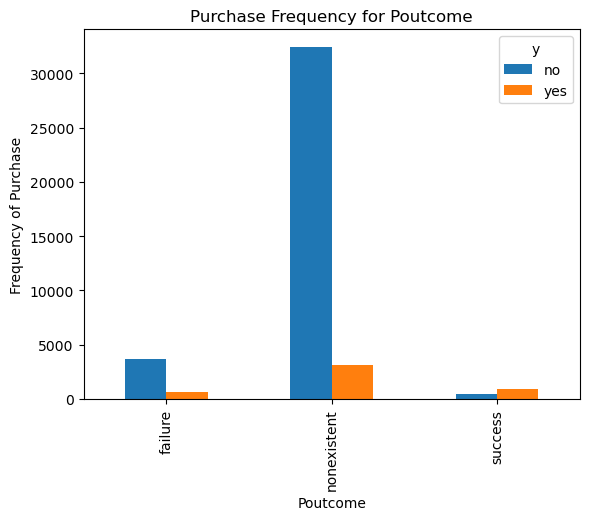

In [14]:
pd.crosstab(bank.poutcome,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

Poutcome seems to be a good predictor of the outcome variable.

### 3.2 Distribution of fields

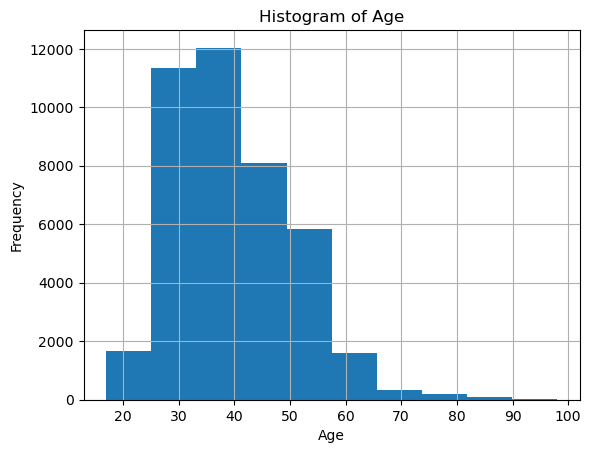

In [15]:
bank.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

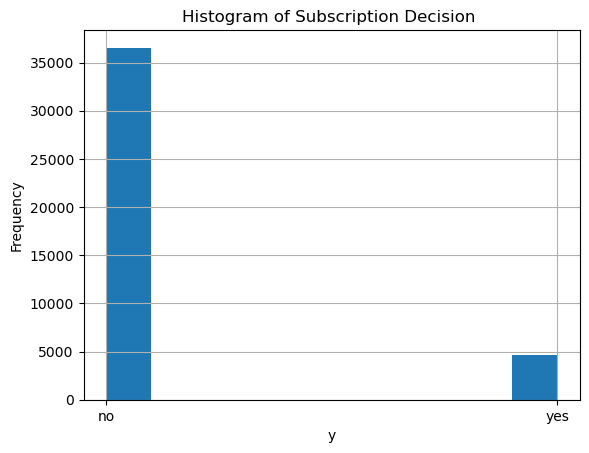

In [16]:
bank.y.hist()
plt.title('Histogram of Subscription Decision ')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.savefig('y_prediction')

### 3.3 Interesting relationships

In [17]:
import plotly.express as px

fig = px.box(bank, x="job", y="duration", color="y")
fig.update_layout(title='Duration vs Job : ')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

Relationship:
    
    1.The leads who have not made a deposit have lesser duration on calls
    2.Comparing the average, the blue collar, entrepreneur have high duration in calls and student, retired have less duration in average

In [18]:
import plotly.express as px

fig = px.scatter(bank, x="campaign", y="duration", color="y")
fig.update_layout(title='Duration vs Campaign')
fig.show()

Relationship:

    1.The more the duration the calls were, they had higher probability in making a deposit
    2.Duration of calls faded as the time period of campaign extended further
    3.There were many positive leads in the initial days of campaign

Text(0.5, 1.0, 'Duration vs Campaign')

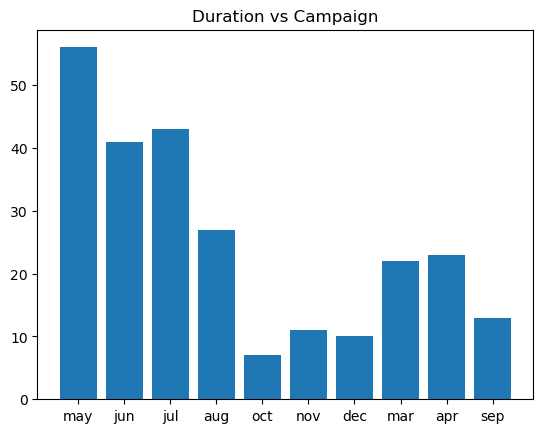

In [19]:
plt.bar(bank['month'], bank['campaign'])
plt.title('Duration vs Campaign')

Relationship:

    1.We can see the campaign were mostly concentrated in the starting of the bank period ( May, June and July)
    2.Usually education period starts during that time so there is a possibility that parents make deposits in the name of their children
    3.They also have made their campaign in the end of the bank period.

Text(0.5, 1.0, 'Martial Status vs Price index')

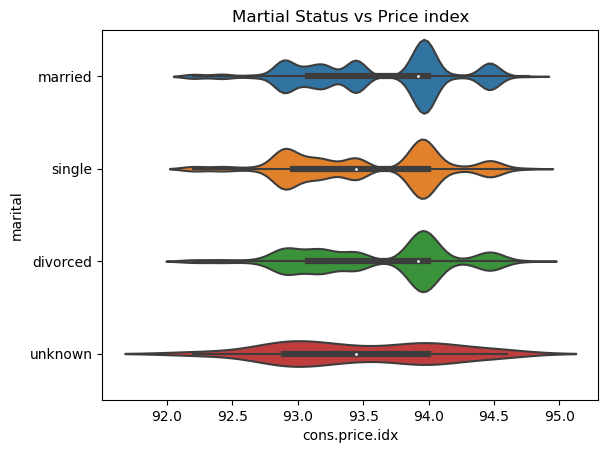

In [20]:
import seaborn as sns

sns.violinplot( y=bank["marital"], x=bank["cons.price.idx"] )
plt.title('Martial Status vs Price index')

Relationship:

    1.There are very minute differences among the price index
    2.Married leads have considerably have an upper hand as they have index contributing as couple

<Axes: xlabel='education'>

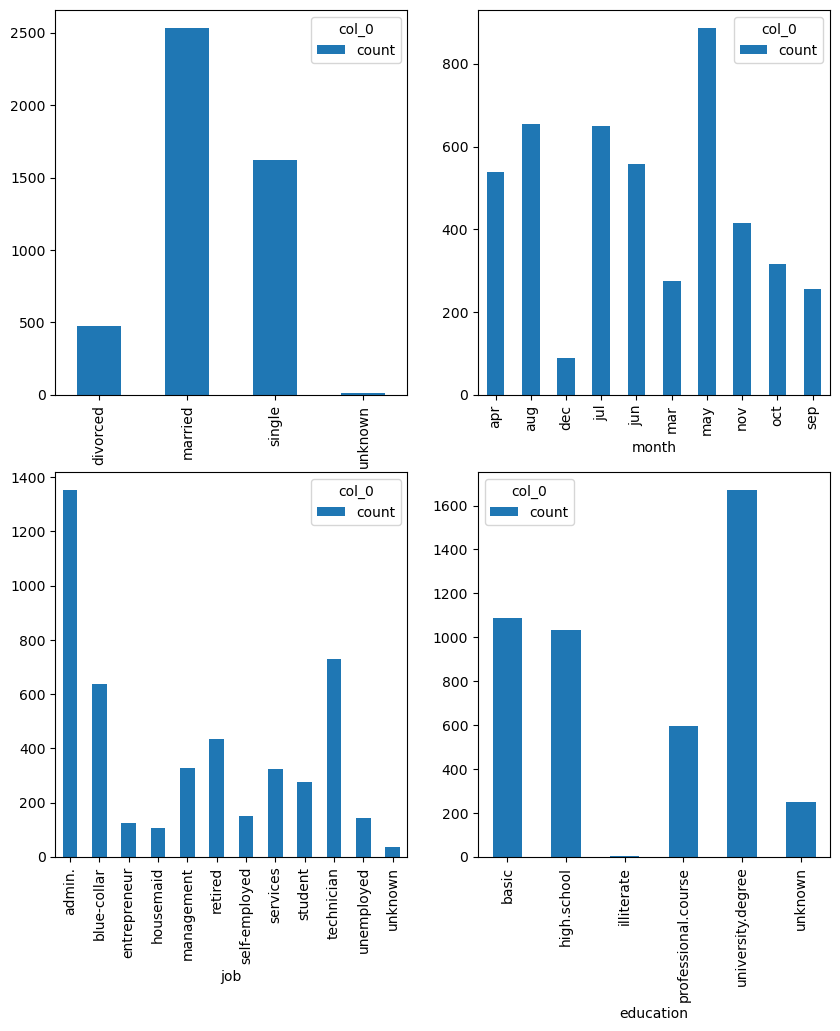

In [21]:
bank_yes = bank[bank['y']=='yes']


df1 = pd.crosstab(index = bank_yes["marital"],columns="count")    
df2 = pd.crosstab(index = bank_yes["month"],columns="count")  
df3= pd.crosstab(index = bank_yes["job"],columns="count") 
df4=pd.crosstab(index = bank_yes["education"],columns="count")

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10, 11))
df1.plot.bar(ax=axes[0,0])
df2.plot.bar(ax=axes[0,1])
df3.plot.bar(ax=axes[1,0])
df4.plot.bar(ax=axes[1,1])  

Relationship:

    1.Married leads have made high deposits followed by single
    2.There were much deposist made during may month as it is the start of bank period
    3.Leads who work in administrative position made deposits followed by technicians and blue collar employees
    4.Leads who had atleast university degree had made te deposits followed by highschool

### Feature Engineering

/var/folders/tr/w1p0_qfx0d1djxdn2568zcw80000gn/T/ipykernel_2499/4277691849.py:4: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



Text(0.5, 1.0, 'No of employees')

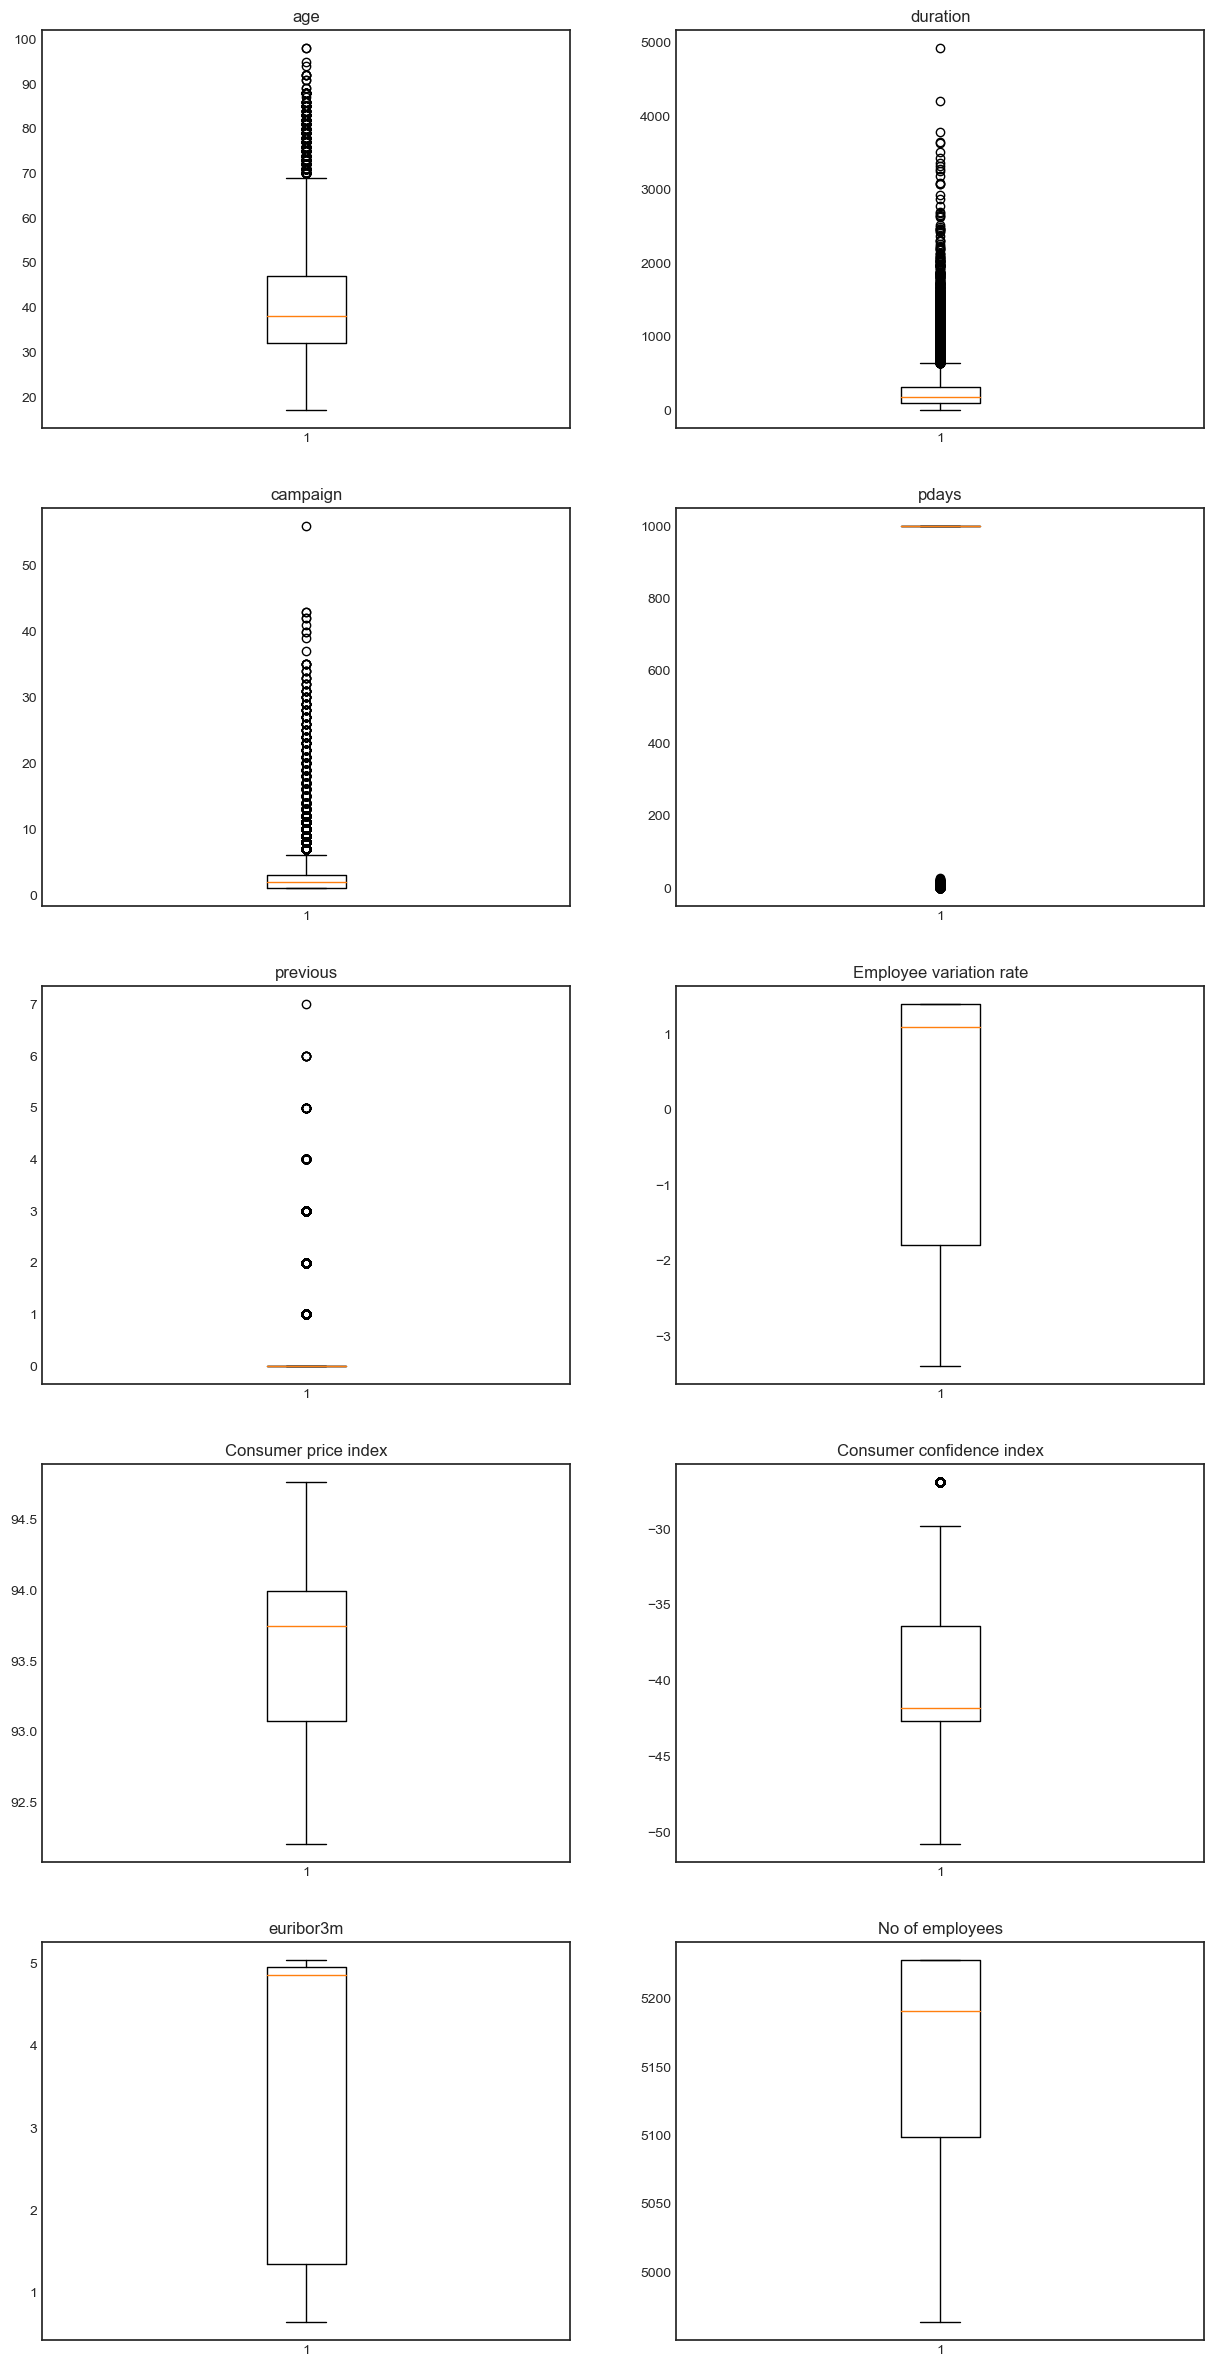

In [22]:
#Handing outliers

plt.figure(figsize = (15, 30))
plt.style.use('seaborn-white')
ax=plt.subplot(521)
plt.boxplot(bank['age'])
ax.set_title('age')
ax=plt.subplot(522)
plt.boxplot(bank['duration'])
ax.set_title('duration')
ax=plt.subplot(523)
plt.boxplot(bank['campaign'])
ax.set_title('campaign')
ax=plt.subplot(524)
plt.boxplot(bank['pdays'])
ax.set_title('pdays')
ax=plt.subplot(525)
plt.boxplot(bank['previous'])
ax.set_title('previous')
ax=plt.subplot(526)
plt.boxplot(bank['emp.var.rate'])
ax.set_title('Employee variation rate')
ax=plt.subplot(527)
plt.boxplot(bank['cons.price.idx'])
ax.set_title('Consumer price index')
ax=plt.subplot(528)
plt.boxplot(bank['cons.conf.idx'])
ax.set_title('Consumer confidence index')
ax=plt.subplot(529)
plt.boxplot(bank['euribor3m'])
ax.set_title('euribor3m')
ax=plt.subplot(5,2,10)
plt.boxplot(bank['nr.employed'])
ax.set_title('No of employees')

We see that many features doesn't have much outliers except for age,duration and campaign. So, let's fix only those features using IQR method

In [23]:
numerical_features=['age','campaign','duration']
for cols in numerical_features:
    Q1 = bank[cols].quantile(0.25)
    Q3 = bank[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (bank[cols] >= Q1 - 1.5 * IQR) & (bank[cols] <= Q3 + 1.5 *IQR)
    bank=bank.loc[filter]

/var/folders/tr/w1p0_qfx0d1djxdn2568zcw80000gn/T/ipykernel_2499/473077291.py:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



Text(0.5, 1.0, 'campaign')

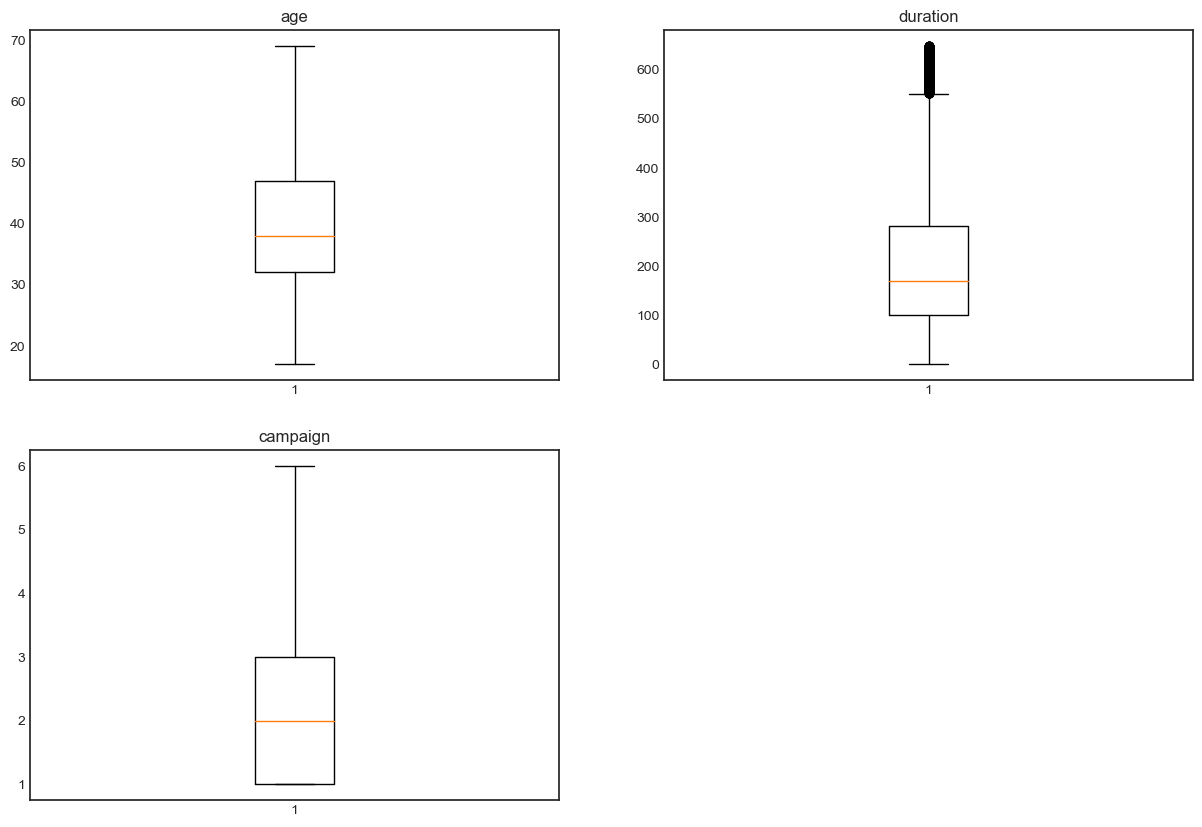

In [24]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(bank['age'])
ax.set_title('age')
ax=plt.subplot(222)
plt.boxplot(bank['duration'])
ax.set_title('duration')
ax=plt.subplot(223)
plt.boxplot(bank['campaign'])
ax.set_title('campaign')

Now that we have removed outliers, we can proceed for more feature engineering techniques.

In [25]:
#Encoding the categories in month and day of week to the respective numbers.

month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
bank['month']= bank['month'].map(month_dict) 

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
bank['day_of_week']= bank['day_of_week'].map(day_dict) 

In [26]:
bank.loc[:, ['month', 'day_of_week']].head()

month  day_of_week
0      5            2
1      5            2
2      5            2
3      5            2
4      5            2

In [27]:
#Encoding 999 in pdays feature( i.e clients who haven't been contacted for the previous campaign) into 0

bank.loc[bank['pdays'] == 999, 'pdays'] = 0
bank['pdays'].value_counts()

pdays
0     34305
3       367
6       343
4       105
9        54
2        51
12       50
7        48
10       44
5        38
13       28
1        23
11       22
15       20
14       15
8        14
16       10
17        8
18        6
22        3
21        2
25        1
26        1
27        1
20        1
19        1
Name: count, dtype: int64

In [28]:
#Here we encode the features which has yes,no and unknown. We'll assign yes:1,no:0 and unknown:-1

dictionary={'yes':1,'no':0,'unknown':-1}
bank['housing']=bank['housing'].map(dictionary)
bank['default']=bank['default'].map(dictionary)
bank['loan']=bank['loan'].map(dictionary)
dictionary1={'no':0,'yes':1}
bank['y']=bank['y'].map(dictionary1)
bank.loc[:,['housing','default','loan','y']].head()

housing  default  loan  y
0        0        0     0  0
1        0       -1     0  0
2        1        0     0  0
3        0        0     0  0
4        0        0     1  0

In [29]:
#Ordinal Encoding

dummy_contact=pd.get_dummies(bank['contact'], prefix='dummy',drop_first=True)
dummy_outcome=pd.get_dummies(bank['poutcome'], prefix='dummy',drop_first=True)
bank = pd.concat([bank,dummy_contact,dummy_outcome],axis=1)
bank.drop(['contact','poutcome'],axis=1, inplace=True)
bank.loc[:,['dummy_telephone','dummy_nonexistent','dummy_success']].head()

dummy_telephone  dummy_nonexistent  dummy_success
0             True               True          False
1             True               True          False
2             True               True          False
3             True               True          False
4             True               True          False

In [30]:
#Frequency encoding

bank_job=bank['job'].value_counts().to_dict()
bank_ed=bank['education'].value_counts().to_dict()
bank['job']=bank['job'].map(bank_job)
bank['education']=bank['education'].map(bank_ed)

In [31]:
bank.loc[:,['job','education']].head()

job  education
0   899      10688
1  3456       8287
2  3456       8287
3  9110      10688
4  3456       8287

In [32]:
#Target Guided Ordinal Encoding

bank.groupby(['marital'])['y'].mean()

marital
divorced    0.063988
married     0.069050
single      0.113226
unknown     0.129032
Name: y, dtype: float64

In [33]:
ordinal_labels=bank.groupby(['marital'])['y'].mean().sort_values().index
ordinal_labels

Index(['divorced', 'married', 'single', 'unknown'], dtype='object', name='marital')

In [34]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2
bank['marital_ordinal']=bank['marital'].map(ordinal_labels2)
bank.drop(['marital'], axis=1,inplace=True)
bank.marital_ordinal.value_counts()

marital_ordinal
1    21506
2    10086
0     3907
3       62
Name: count, dtype: int64

### 3.4 Correlation analysis:

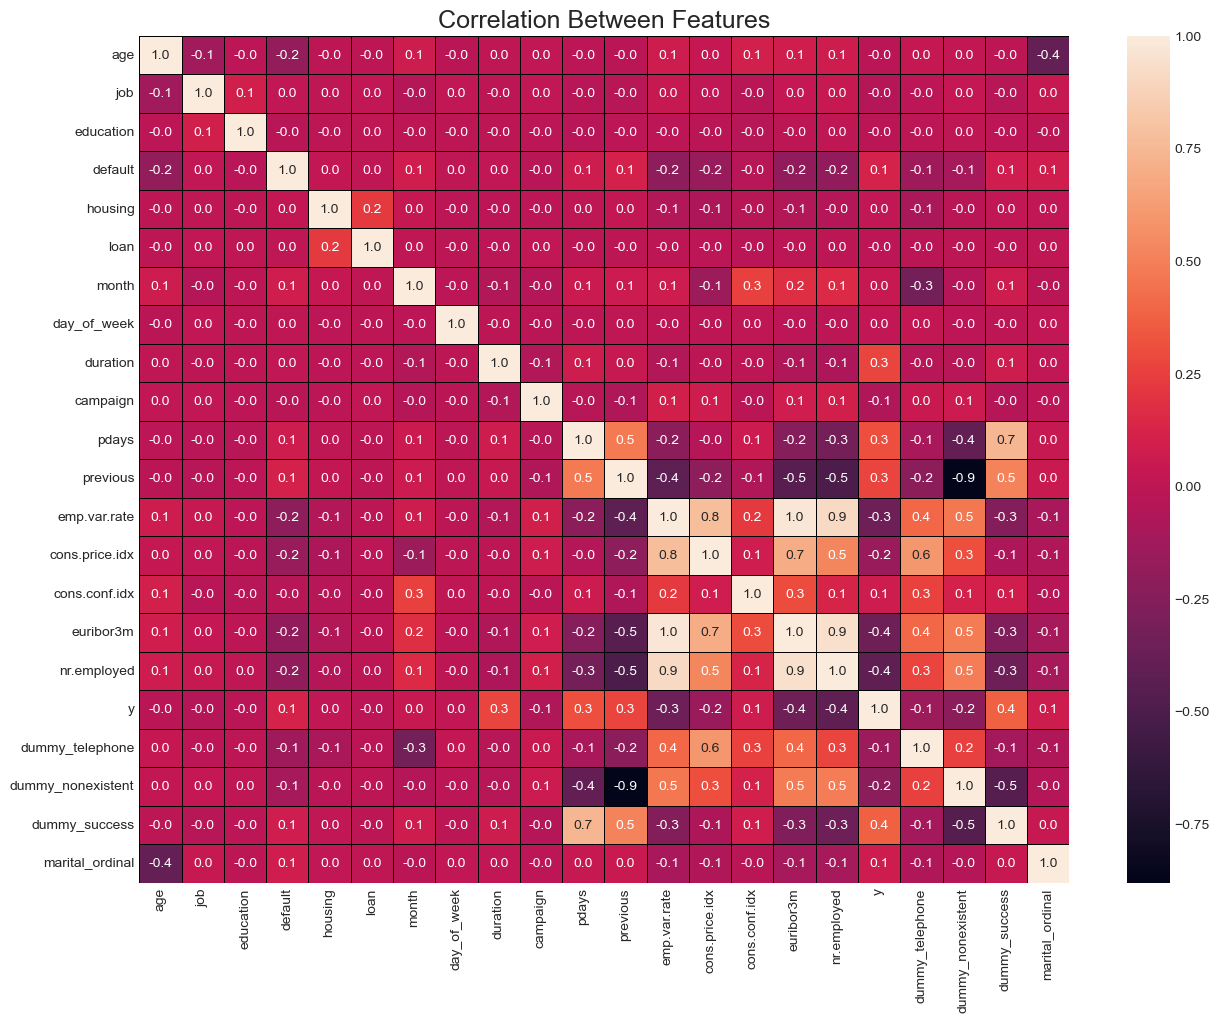

In [35]:
f,ax=plt.subplots(figsize=(15,11))
sns.heatmap(bank.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.title('Correlation Between Features', fontsize=18)
plt.show()

### 3.5 Important variables wrt target variable DIED 

In [36]:
correlation_with_target = bank.corr()['y'].sort_values(ascending=False)
print(correlation_with_target)

y                    1.000000
dummy_success        0.368350
pdays                0.308694
duration             0.269535
previous             0.265501
default              0.114786
cons.conf.idx        0.072849
marital_ordinal      0.067247
month                0.038453
housing              0.012973
day_of_week          0.008970
loan                -0.006520
age                 -0.016810
education           -0.017814
job                 -0.036643
campaign            -0.058109
dummy_telephone     -0.148679
cons.price.idx      -0.159319
dummy_nonexistent   -0.222040
emp.var.rate        -0.345633
euribor3m           -0.352032
nr.employed         -0.410429
Name: y, dtype: float64


### 3.6 Principal Component Analysis

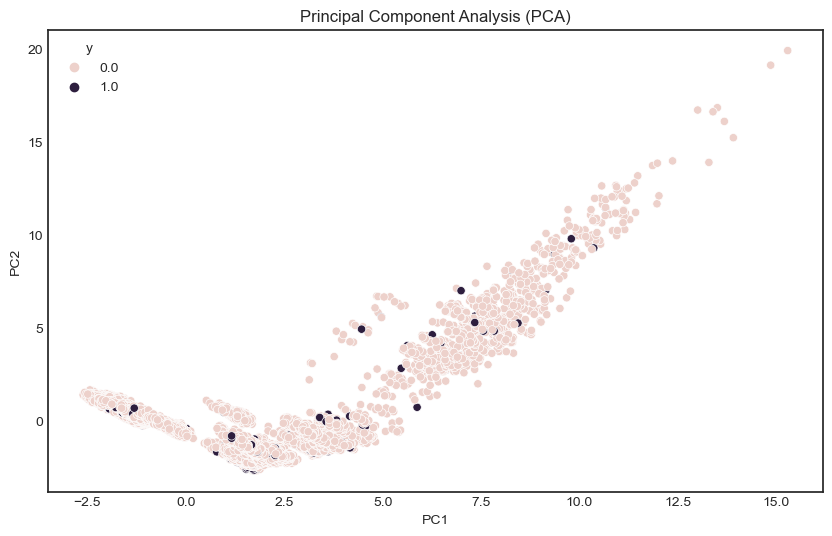

In [37]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

numerical_cols = ['age','duration','job','month','day_of_week','pdays','education','campaign','marital_ordinal','default','dummy_nonexistent','dummy_telephone','dummy_success','loan','housing','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
X = bank[numerical_cols]
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)
bank_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
bank_pca['y'] = bank['y']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='y', data=bank_pca)
plt.title('Principal Component Analysis (PCA)')
plt.show()

In [38]:
bank_pca

PC1       PC2    y
0     -1.571002  0.978368  0.0
1     -1.886020  1.166264  0.0
2     -1.458107  0.705328  0.0
3     -1.581467  0.738029  0.0
4     -1.560233  0.942208  0.0
...         ...       ...  ...
35556  1.438368 -1.298882  0.0
35557  8.247222  7.464393  0.0
35558  1.390670 -1.013720  0.0
35559  1.337746 -1.064648  NaN
35560  1.428663 -0.999521  0.0

[35561 rows x 3 columns]

### 3.7. Feature Selection

In [39]:
from sklearn.ensemble import ExtraTreesClassifier

X=bank.drop(['y'],axis=1)
y=bank.y

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

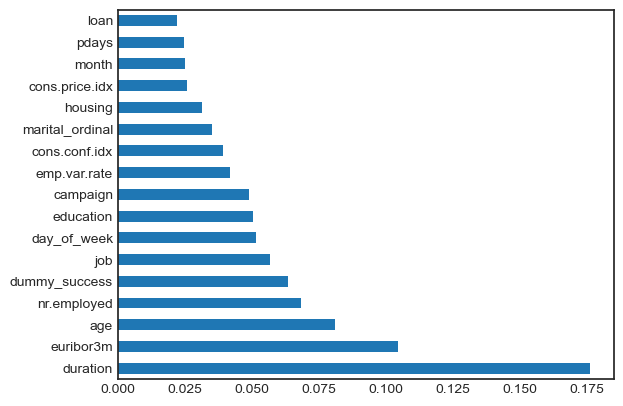

In [40]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

In [41]:
#Train and Test Split (80:20)

from sklearn.model_selection import train_test_split
X=bank.drop(['pdays','month','cons.price.idx','loan','housing','emp.var.rate','y'],axis=1)
y=bank.y

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (28448, 15)
Input Test: (7113, 15)
Output Training: (28448,)
Output Test: (7113,)


In [42]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)
X_train_scaled.head()

age       job  education   default  day_of_week  duration  campaign  \
0  0.140472 -1.615106   0.635207  0.511969     0.029745 -0.726926 -0.033272   
1 -0.477328 -1.619015   0.635207  0.511969     1.448316  1.094869 -0.033272   
2  0.964205  0.723192   0.685426 -1.950745     0.029745 -1.105574 -0.811665   
3  0.964205 -1.619015  -1.702509 -1.950745     0.029745  1.359208 -0.033272   
4  0.243438 -0.782256  -0.249271 -1.950745     1.448316  0.287564 -0.033272   

   previous  cons.conf.idx  euribor3m  nr.employed  dummy_telephone  \
0  1.653966      -0.318693   0.298318     0.409559        -0.753248   
1 -0.356375      -0.275550   0.786783     0.860561         1.327584   
2  1.653966      -0.318693   0.298318     0.409559        -0.753248   
3 -0.356375       0.954012   0.786783     0.860561        -0.753248   
4 -0.356375       0.889298   0.727383     0.342536         1.327584   

   dummy_nonexistent  dummy_success  marital_ordinal  
0          -2.464009      -0.184551        -1.938893  
1           0.405843      -0.184551        -0.289788  
2          -2.464009      -0.184551        -0.289788  
3           0.405843      -0.184551        -0.289788  
4           0.405843      -0.184551        -0.289788

### 4.Model building

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

/Users/madhurisathish/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/madhurisathish/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users

Logistic Regression Test Accuracy: 0.8804297313904078
Decision Tree Test Accuracy: 0.6406659439568929
KNN Test Accuracy: 0.8757897022079437
SVC Test Accuracy: 0.9188718011316903
Naive Bayes Test Accuracy: 0.8476400800968195


In [44]:
#Logistic regression with Hyperparameter tuning

from sklearn.model_selection import GridSearchCV

param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

/Users/madhurisathish/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/madhurisathish/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

LogisticRegression(C=0.12648552168552957, random_state=0)
The mean accuracy of the model is: 0.9257697174188106


/Users/madhurisathish/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### 5.Evaluation

In [45]:
#Accuracy

logreg = LogisticRegression(C=0.18420699693267145, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


/Users/madhurisathish/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)

Confusion Matrix:
 [[6432  106]
 [ 420  155]]


In [47]:
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      6538
           1       0.59      0.27      0.37       575

    accuracy                           0.93      7113
   macro avg       0.77      0.63      0.67      7113
weighted avg       0.91      0.93      0.91      7113



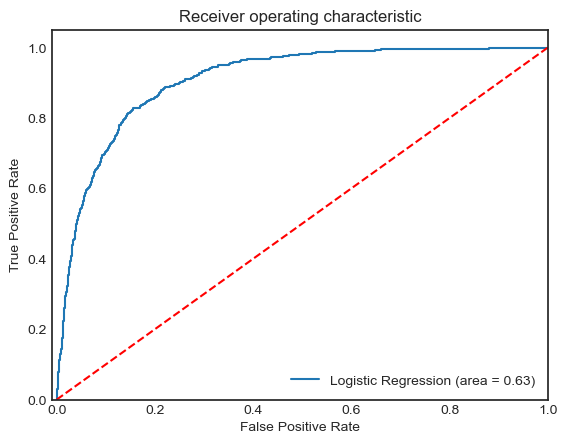

In [48]:
#ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [49]:
#SVC

from sklearn import metrics
svc_classifier = SVC(random_state = 0)
svc_classifier.fit(X_train,y_train)
y_pred=svc_classifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9191620975678335
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      6538
           1       0.00      0.00      0.00       575

    accuracy                           0.92      7113
   macro avg       0.46      0.50      0.48      7113
weighted avg       0.84      0.92      0.88      7113



/Users/madhurisathish/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/madhurisathish/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/madhurisathish/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### 6.Discussion

### 6.1 Summarize your findings and analysis


Methodology:
The project's goal is to classify whether a client will subscribe to a bank term deposit, leveraging the provided dataset. The model aims to identify patterns and relationships within client data to predict subscription likelihood in future marketing campaigns.
Data Overview:
The dataset originates from the UCI Repository, capturing information from direct marketing campaigns of a Portuguese bank. The campaigns involved phone calls promoting a bank term deposit. Each dataset entry corresponds to a client's response to the campaign, either subscribing or not subscribing to the term deposit.
Model Details:
The notebook includes data preprocessing steps, such as importing necessary libraries, standardizing numerical columns, and possibly performing principal component analysis (PCA) for dimensionality reduction. However, the specifics of the model used for prediction (e.g., logistic regression, decision tree, etc.) are not clearly detailed in the provided summary.
Evaluation:
The notebook contains a snippet for generating a confusion matrix, which is a key evaluation metric for classification problems. This indicates an assessment of the model's performance, but specifics like accuracy, precision, recall, or F1-score are not explicitly mentioned in the summarized section.
Other Observations:
The notebook begins with importing the dataset and performing exploratory data analysis, including examining the data's shape, information, and descriptive statistics. It also involves processing categorical data, like the 'education' column.

### 6.2 What further analysis can be done? 

Recursive Feature Elimination (RFE): Implement RFE to systematically remove less significant features. Observe how the model's performance changes with each iteration. This process can help in identifying the most impactful features.

Feature Importance via Model Coefficients: If logistic regression or similar models are used, examine the coefficients to gauge feature importance. For tree-based models, look at feature importances provided by the model.

K-Fold Cross-Validation: Implement K-Fold cross-validation to ensure the model's stability and generalizability. This will help in understanding the model’s performance variance across different data subsets.

Stratified Cross-Validation: For imbalanced datasets, use stratified cross-validation to maintain the same percentage of each target class as in the original dataset in every fold.

Ensemble Methods: Try ensemble models like Random Forests or Gradient Boosting Machines (GBMs) which often perform well for classification tasks.

Support Vector Machines (SVM): Test SVMs, especially if the data has a clear margin of separation.
Neural Networks: For complex relationships, a simple neural network could be explored, although this might require more computational resources and fine-tuning.

Hyperparameter Optimization: Use these techniques for exhaustive or random sampling of hyperparameter space respectively. This is especially useful for models like SVMs or ensemble methods where the right combination of hyperparameters can significantly improve performance.